# Modelo de Arboles de Decisión
## Jacobo P. Marín
#### Universidad Nacional Abierta y a Distancia
#### Dataset: Red Wine Quality

### 1. Importación de Librerías y Datos

In [4]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuraciones adicionales
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

# Cargar el dataset
df = pd.read_csv('winequality-red.csv')

# Verificar nombres de columnas y limpiarlos si es necesario
df.columns = df.columns.str.strip()
print("\nNombres de las columnas:")
print(df.columns.tolist())

df.head(10)


Nombres de las columnas:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### 2. Análisis Exploratorio


Resumen Estadístico:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000        

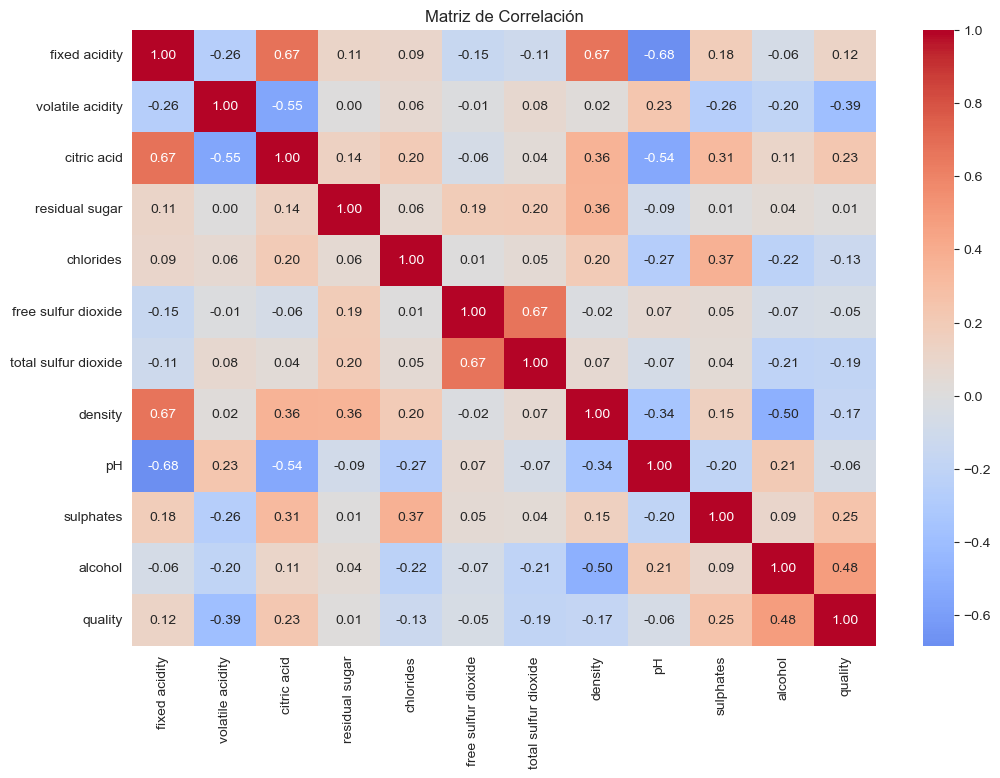

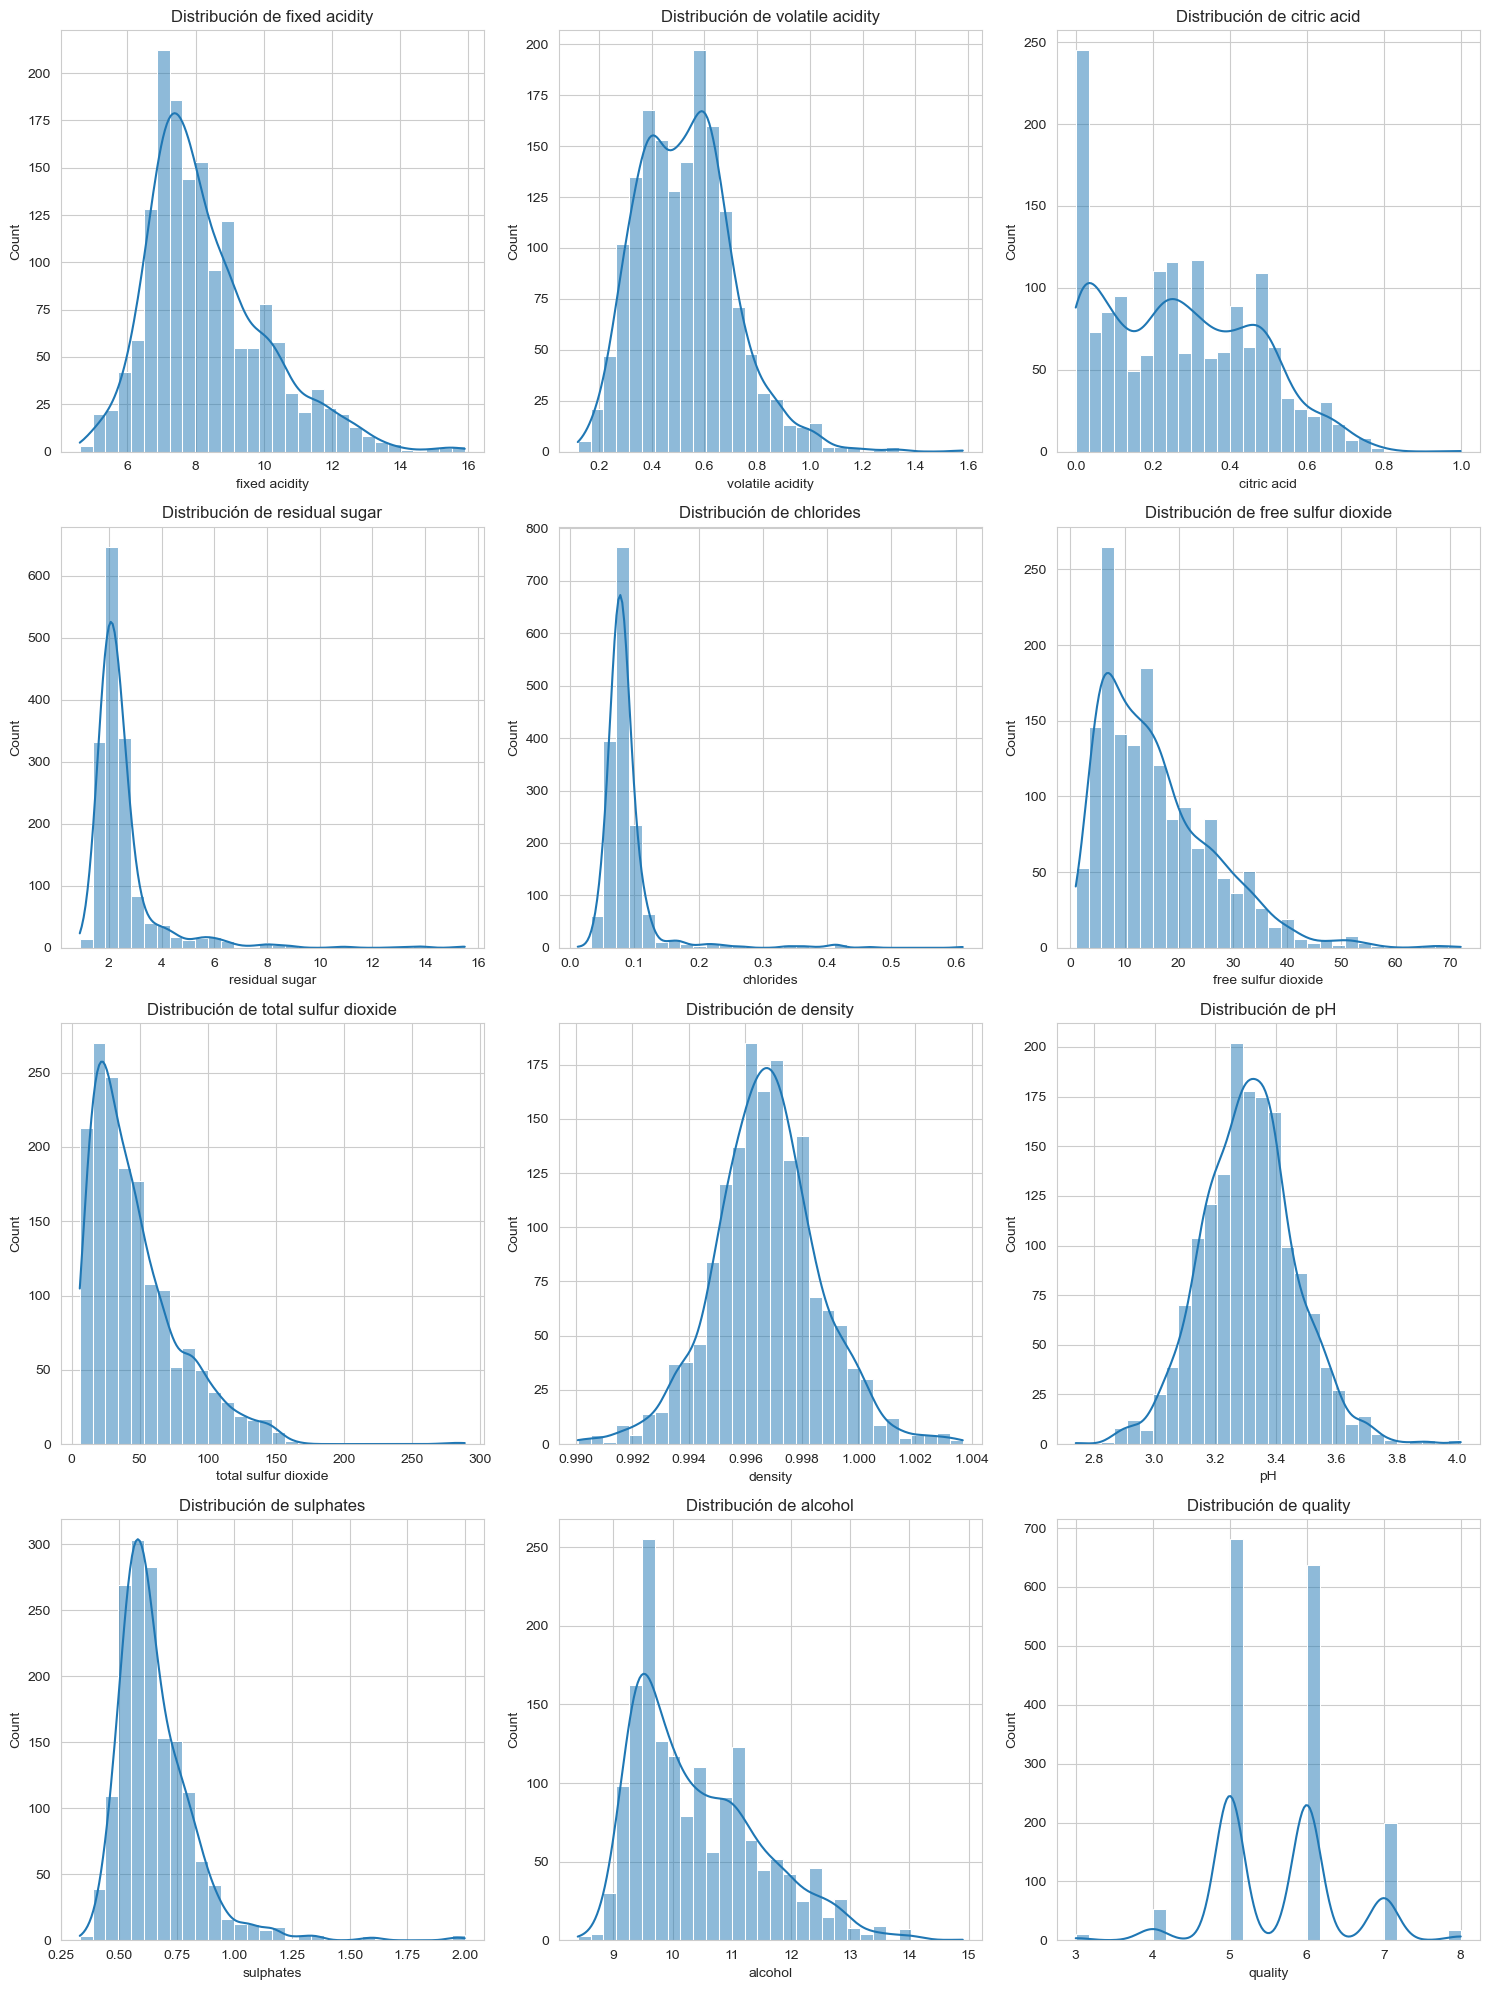

In [6]:
# Resumen estadístico
print("\nResumen Estadístico:")
print(df.describe())

# Información general del dataset
df.info()

# Verificar valores nulos
print("\nValores nulos:")
print(df.isnull().sum())

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Histograma de las variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

### 3. Preprocesamiento

In [10]:
# Verificar duplicados
print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# Limpiar valores nulos
df_clean = df.copy()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

# Llenar valores faltantes numéricos con la media
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

print("\nValores nulos después del tratamiento:")
print(df_clean.isnull().sum())


Número de filas duplicadas: 240

Valores nulos después del tratamiento:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [117]:
# Convertir 'quality' en una variable binaria: 1 para vinos buenos, 0 para el resto
df_clean['quality'] = df_clean['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Verificar la nueva distribución de la variable objetivo
print("\nDistribución de la nueva variable 'quality':")
print(df_clean['quality'].value_counts())



Distribución de la nueva variable 'quality':
quality
0    1382
1     217
Name: count, dtype: int64


### 4. Selección de características

In [16]:
X = df_clean[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df_clean['quality'] # Variable objetivo

In [18]:
corr = X.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


<function matplotlib.pyplot.show(close=None, block=None)>

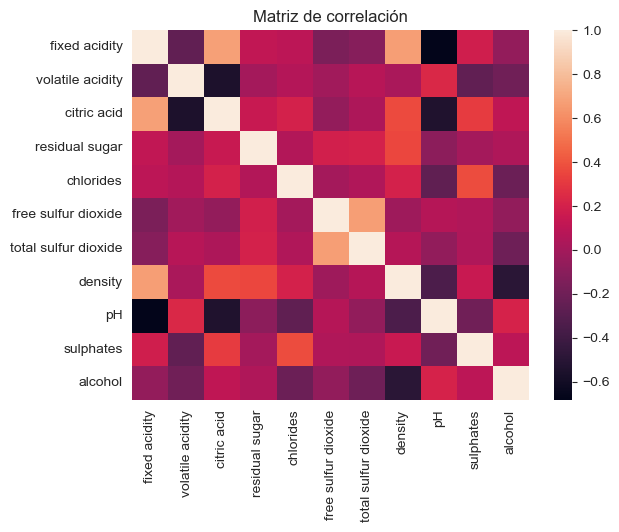

In [20]:
sns.heatmap(corr)
plt.title('Matriz de correlación')
plt.show

### 5. Division del Dataset en Train y Test

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (1199, 11)
Tamaño del conjunto de prueba: (400, 11)


In [24]:
print (X_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
803             7.7              0.56         0.08            2.50      0.114   
124             7.8              0.50         0.17            1.60      0.082   
350            10.7              0.67         0.22            2.70      0.107   
682             8.5              0.46         0.31            2.25      0.078   
1326            6.7              0.46         0.24            1.70      0.077   
...             ...               ...          ...             ...        ...   
1565            6.7              0.67         0.02            1.90      0.061   
327            10.3              0.44         0.50            4.50      0.107   
254             7.1              0.60         0.00            1.80      0.074   
322             7.8              0.62         0.05            2.30      0.079   
1160           10.6              0.36         0.57            2.30      0.087   

      free sulfur dioxide  

In [26]:
print (X_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
582            11.7             0.490         0.49             2.2      0.083   
626             8.8             0.600         0.29             2.2      0.098   
1030            7.1             0.590         0.00             2.1      0.091   
620             8.3             0.540         0.24             3.4      0.076   
490             9.3             0.775         0.27             2.8      0.078   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free sulfur dioxide  

### 6. Entranamiento del modelo

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo con hiperparámetros básicos
tree_model = DecisionTreeClassifier()

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree_model.predict(X_test)


[Text(0.556563864628821, 0.9736842105263158, 'x[10] <= 10.525\ngini = 0.644\nsamples = 1199\nvalue = [9, 40, 517, 469, 151, 13]'),
 Text(0.3920032751091703, 0.9210526315789473, 'x[6] <= 98.5\ngini = 0.541\nsamples = 737\nvalue = [6.0, 27.0, 439.0, 235.0, 28.0, 2.0]'),
 Text(0.47428356986899567, 0.9473684210526316, 'True  '),
 Text(0.23466157205240173, 0.868421052631579, 'x[9] <= 0.575\ngini = 0.569\nsamples = 643\nvalue = [6.0, 26.0, 352.0, 230.0, 27.0, 2.0]'),
 Text(0.07060589519650655, 0.8157894736842105, 'x[10] <= 9.75\ngini = 0.501\nsamples = 248\nvalue = [4, 20, 165, 55, 4, 0]'),
 Text(0.04017467248908297, 0.7631578947368421, 'x[3] <= 4.35\ngini = 0.397\nsamples = 157\nvalue = [2.0, 11.0, 119.0, 24.0, 1.0, 0.0]'),
 Text(0.0314410480349345, 0.7105263157894737, 'x[8] <= 3.54\ngini = 0.36\nsamples = 150\nvalue = [2, 9, 118, 20, 1, 0]'),
 Text(0.02794759825327511, 0.6578947368421053, 'x[10] <= 9.075\ngini = 0.338\nsamples = 147\nvalue = [2, 9, 118, 17, 1, 0]'),
 Text(0.013973799126637

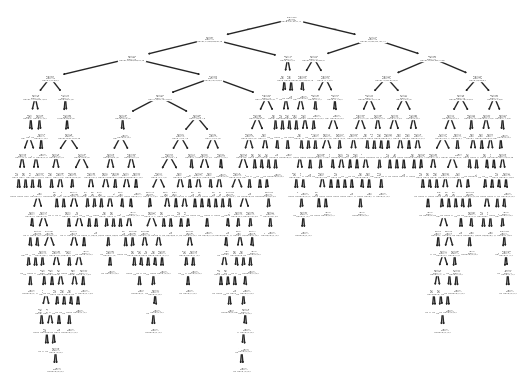

In [44]:
plot_tree(tree_model)

### 7. Evaluación

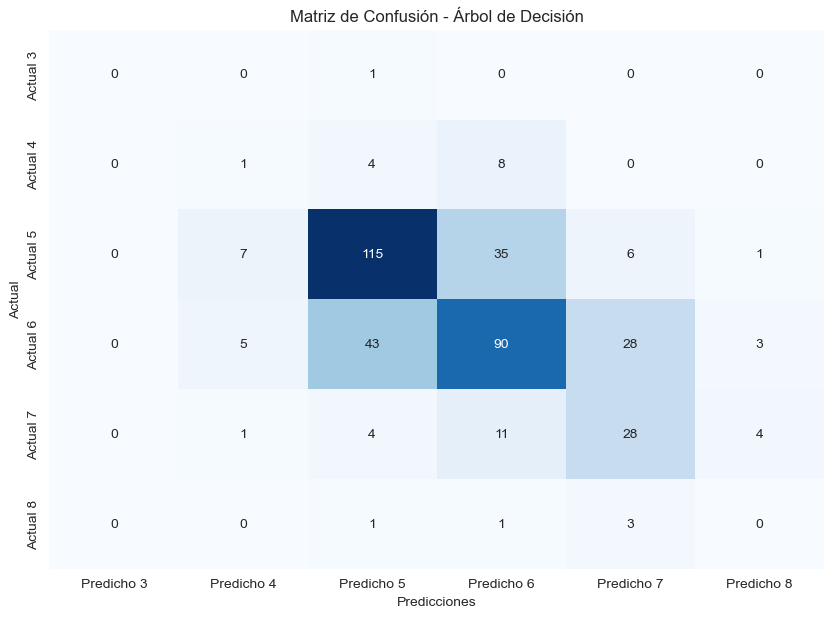

In [56]:
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Crear un DataFrame para mejorar la legibilidad de la matriz
df_cm = pd.DataFrame(matriz_confusion, 
                     index=[f"Actual {i}" for i in sorted(y_test.unique())],
                     columns=[f"Predicho {i}" for i in sorted(y_test.unique())])

# Graficar la matriz de confusión con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Añadir etiquetas y título
plt.xlabel("Predicciones")
plt.ylabel("Actual")
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

In [78]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.585

In [80]:
precision = precision_score(y_test, y_pred, average='weighted')
precision

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.596909877478843

In [82]:
recall = recall_score(y_test, y_pred, average='weighted')
recall

0.585

In [84]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.5881100307636926